# Preface
My occupation is wizard: I wave my magic wand and shit happens. 
> We are about to talk about study the idea of a computational process. Computational processes are abstract beings that inhabit computers. As they evolve, processes manipulate other abstract things called data. The evolution of a process is directed by a pattern of rules called a program. People create programs to direct processes. In effect, we conjure the spirits of the computer with our spells.

One of the factions in Hogwarts pushes the agenda of embracing computational process that emulates human brain and saught to obtain the oracle of solving complex problems which other factions struggled to solve. The protagonist faction in this book calls themselves Connectionists, and this is the story of connectionsm.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
import numpy as np

# source file mlp.py
import mlp

## Multi-layer perceptrons

- 3 layer architecture
- feed forward
- backpropagate for gradient descent
- update _once_ every epoch, not during sample loop
- training testing split, testing set untouchable
- mini batch gradient descent for hand-written letter


In [2]:
xor_X,xor_y = mlp.get_Xor_data()

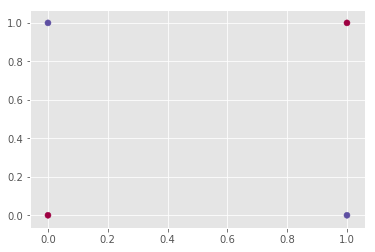

In [3]:
plt.scatter(xor_X[:,0],xor_X[:,1], c=xor_y[:,1], cmap=plt.cm.Spectral)

In [4]:
# 2 hidden unit MLP for XOR demonstration
xor_mlp_2 = mlp.MLP(xor_X, xor_y, 2)

In [5]:
_,losslog =xor_mlp_2.train(print_loss=True)


Data loss (cross entropy) after epoch 0: 0.6861598242933123
Data loss (cross entropy) after epoch 2000: 0.5028045648406304
Data loss (cross entropy) after epoch 4000: 0.4788524896088624
Data loss (cross entropy) after epoch 6000: 0.030596319443061536
Data loss (cross entropy) after epoch 8000: 0.012764644071794779
Data loss (cross entropy) after epoch 10000: 0.007943765071568059
Data loss (cross entropy) after epoch 12000: 0.005736992837964628
Data loss (cross entropy) after epoch 14000: 0.004479064073832158
Data loss (cross entropy) after epoch 16000: 0.003668658218050916
Data loss (cross entropy) after epoch 18000: 0.0031039719089720483
Data loss (cross entropy) after epoch 20000: 0.0026884077996359853
Data loss (cross entropy) after epoch 22000: 0.0023700195106840447
Data loss (cross entropy) after epoch 24000: 0.002118422822539804
Data loss (cross entropy) after epoch 26000: 0.0019146763676030475
Data loss (cross entropy) after epoch 28000: 0.0017463663143026439
Data loss (cross en

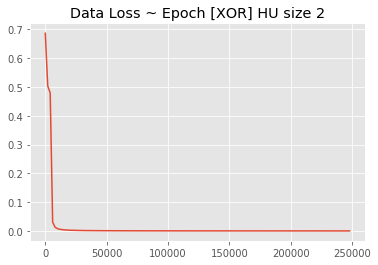

In [6]:
plt.plot([i[0] for i in losslog],[i[1] for i in losslog])
plt.title("Data Loss ~ Epoch [XOR] HU size {0}".format(2))

In [7]:
def plot_xor_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = xor_X[:, 0].min() - .5, xor_X[:, 0].max() + .5
    y_min, y_max = xor_X[:, 1].min() - .5, xor_X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(xor_X[:,0],xor_X[:,1], c=xor_y[:,1], cmap=plt.cm.Spectral)

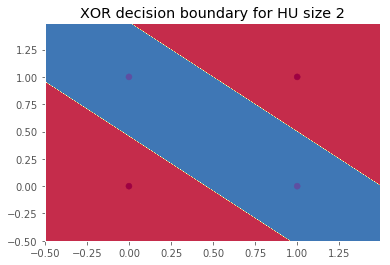

In [8]:
plot_xor_decision_boundary(lambda x: xor_mlp_2.predict(x))
plt.title("XOR decision boundary for HU size {0}".format(2))

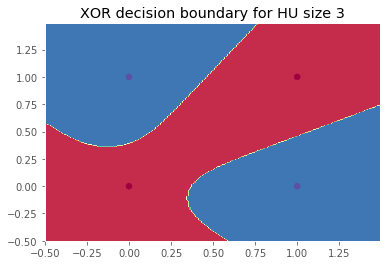

In [9]:
xor_mlp_3 = mlp.MLP(xor_X, xor_y, 3)
xor_mlp_3.train()
plot_xor_decision_boundary(lambda x: xor_mlp_3.predict(x))
plt.title("XOR decision boundary for HU size {0}".format(3))

## Exceptional :)
- 16 attribute
- A-Z as classes
- 20000 samples
- 80% split (recommended)
- 10 hidden units (recommended)

In [10]:
import pandas as pd # only for csv reading, no other usage, i swear :)
dataset = pd.read_csv('letter-recognition.data',delimiter=',',header=None)
print("shape {0}".format(dataset.shape))
dataset.head()

shape (20000, 17)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [11]:
hwl_X, hwl_y= mlp.get_Hwl_data()

In [12]:
training_X, training_y, testing_X, testing_y = mlp.get_data_split(hwl_X, hwl_y, 0.8)

In [13]:
training_X.shape[0]

16000

In [14]:
# recommended 10 hidden units
hwl_mlp_10 = mlp.MLP(training_X, training_y, 10)



# train using mini batch, batch size 16 (2^4 for cache friendliness, my laptop is poor)
acclog, losslog = hwl_mlp_10.minibatch_train(batch_size=16, testset_X=testing_X, testset_y=testing_y, print_loss=True)

Data loss (cross entropy) after epoch 0: 3.2542734590535165
Accuracy after epoch 0: 0.051
Data loss (cross entropy) after epoch 2000: 1.6103839750405673
Accuracy after epoch 2000: 0.483
Data loss (cross entropy) after epoch 4000: 1.471010063430903
Accuracy after epoch 4000: 0.527
Data loss (cross entropy) after epoch 6000: 1.4792146931678554
Accuracy after epoch 6000: 0.53525
Data loss (cross entropy) after epoch 8000: 1.3254175787896127
Accuracy after epoch 8000: 0.58675
Data loss (cross entropy) after epoch 10000: 1.3493392199404723
Accuracy after epoch 10000: 0.572
Data loss (cross entropy) after epoch 12000: 1.3390274606386323
Accuracy after epoch 12000: 0.5805
Data loss (cross entropy) after epoch 14000: 1.2647288542189252
Accuracy after epoch 14000: 0.6115
Data loss (cross entropy) after epoch 16000: 1.3279290201037357
Accuracy after epoch 16000: 0.59725
Data loss (cross entropy) after epoch 18000: 1.2606577415059308
Accuracy after epoch 18000: 0.6305
Data loss (cross entropy) af

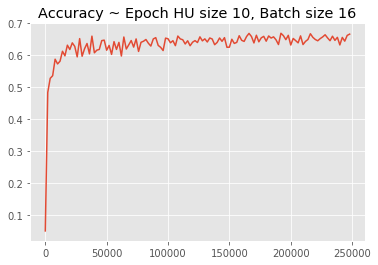

In [15]:
plt.plot([i[0] for i in acclog], [i[1] for i in acclog])
plt.title("Accuracy ~ Epoch HU size {0}, Batch size {1}".format(10,16))

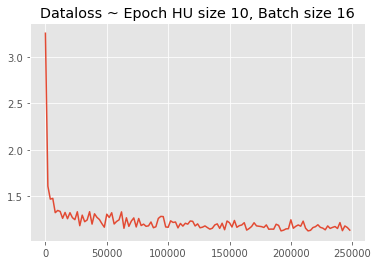

In [16]:
plt.plot([i[0] for i in losslog],[i[1] for i in losslog])
plt.title("Dataloss ~ Epoch HU size {0}, Batch size {1}".format(10,16))

In [17]:
# trying 16 hidden units. rests are same premises as 10 units run
hwl_mlp_16 = mlp.MLP(training_X, training_y, 16)




# data loss is calcuated on training set
# accuracy is calculated on testing set
acclog, losslog = hwl_mlp_16.minibatch_train(batch_size=16, testset_X=testing_X, testset_y=testing_y, print_loss=True)

Data loss (cross entropy) after epoch 0: 3.290627215898279
Accuracy after epoch 0: 0.05175
Data loss (cross entropy) after epoch 2000: 1.5400477098137433
Accuracy after epoch 2000: 0.518
Data loss (cross entropy) after epoch 4000: 1.1950027138708286
Accuracy after epoch 4000: 0.6235
Data loss (cross entropy) after epoch 6000: 1.3002764038528307
Accuracy after epoch 6000: 0.5945
Data loss (cross entropy) after epoch 8000: 1.0710184819193076
Accuracy after epoch 8000: 0.663
Data loss (cross entropy) after epoch 10000: 1.1341553352054807
Accuracy after epoch 10000: 0.64325
Data loss (cross entropy) after epoch 12000: 1.04838863310033
Accuracy after epoch 12000: 0.6715
Data loss (cross entropy) after epoch 14000: 0.9927947691257802
Accuracy after epoch 14000: 0.68375
Data loss (cross entropy) after epoch 16000: 0.9692736067046189
Accuracy after epoch 16000: 0.69275
Data loss (cross entropy) after epoch 18000: 0.9809006199393273
Accuracy after epoch 18000: 0.687
Data loss (cross entropy) af

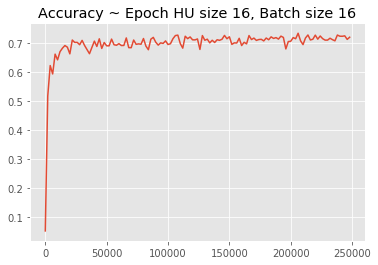

In [18]:
plt.plot([i[0] for i in acclog], [i[1] for i in acclog])
plt.title("Accuracy ~ Epoch HU size {0}, Batch size {1}".format(16,16))

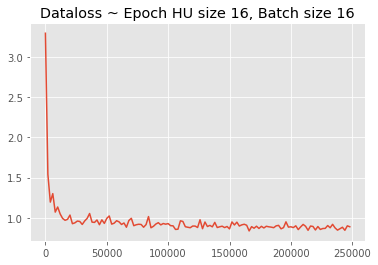

In [19]:
plt.plot([i[0] for i in losslog],[i[1] for i in losslog])
plt.title("Dataloss ~ Epoch HU size {0}, Batch size {1}".format(16,16))